In [ ]:
import tensorflow as tf
import numpy as np
import random
import os
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
!git config --global user.name "jgp3454"
!git config --global user.email "jgpolinski@gmail.com"


In [ ]:
!git clone https://<your_personal_access_token>@github.com/kaitlynrying/PHIL293_Final.git /content/PHIL293_Final


In [4]:
%cd /content/drive/MyDrive/Fall 2024/PHIL 293/
!git add Omniglot_VGG_Flower.ipynb
!git commit -m "Add Omniglot VGG Flower notebook"
!git push origin main


/content/drive/MyDrive/Fall 2024/PHIL 293
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


# Omniglot

In [ ]:
!git clone https://github.com/google-research/meta-dataset.git
%cd meta-dataset

Cloning into 'meta-dataset'...
remote: Enumerating objects: 3141, done.
remote: Counting objects: 100% (916/916), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 3141 (delta 791), reused 812 (delta 757), pack-reused 2225 (from 1)
Receiving objects: 100% (3141/3141), 3.39 MiB | 17.17 MiB/s, done.
Resolving deltas: 100% (2363/2363), done.
/content/meta-dataset


In [ ]:
!pip install -r requirements.txt
!pip install tensorflow-datasets

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:

import zipfile
import os

# Paths to zip files
zips = {
    "images_background": "/content/drive/My Drive/datasets/Omniglot/images_background.zip",
    "images_evaluation": "/content/drive/My Drive/datasets/Omniglot/images_evaluation.zip",
}

# Output directories
output_dirs = {
    "images_background": "/content/drive/My Drive/datasets/Omniglot/",
    "images_evaluation": "/content/drive/My Drive/datasets/Omniglot/",
}

batch_size = 1000  # Files per batch

# Batch extraction function
def batch_extract(zip_path, output_dir, batch_size):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        file_list = zip_ref.namelist()
        total_files = len(file_list)

        for start in range(0, total_files, batch_size):
            end = min(start + batch_size, total_files)
            batch_files = file_list[start:end]

            print(f"Extracting files {start + 1} to {end} out of {total_files} in {os.path.basename(zip_path)}...")
            for file in batch_files:
                output_path = os.path.join(output_dir, file)
                if not os.path.exists(output_path):  # Avoid re-extraction
                    zip_ref.extract(file, output_dir)
            print(f"Batch {start // batch_size + 1} completed.")

# Extract both datasets
for dataset, zip_path in zips.items():
    print(f"Starting extraction for {dataset}...")
    batch_extract(zip_path, output_dirs[dataset], batch_size)
    print(f"Completed extraction for {dataset}.")



Starting extraction for images_background...
Extracting files 1 to 1000 out of 20275 in images_background.zip...
Batch 1 completed.
Extracting files 1001 to 2000 out of 20275 in images_background.zip...
Batch 2 completed.
Extracting files 2001 to 3000 out of 20275 in images_background.zip...
Batch 3 completed.
Extracting files 3001 to 4000 out of 20275 in images_background.zip...
Batch 4 completed.
Extracting files 4001 to 5000 out of 20275 in images_background.zip...
Batch 5 completed.
Extracting files 5001 to 6000 out of 20275 in images_background.zip...
Batch 6 completed.
Extracting files 6001 to 7000 out of 20275 in images_background.zip...
Batch 7 completed.
Extracting files 7001 to 8000 out of 20275 in images_background.zip...
Batch 8 completed.
Extracting files 8001 to 9000 out of 20275 in images_background.zip...
Batch 9 completed.
Extracting files 9001 to 10000 out of 20275 in images_background.zip...
Batch 10 completed.
Extracting files 10001 to 11000 out of 20275 in images_b

In [ ]:
import os

# Path to extracted files
background_dir = "/content/drive/My Drive/datasets/Omniglot/images_background"
evaluation_dir = "/content/drive/My Drive/datasets/Omniglot/images_evaluation"

# Check a few files
for root, dirs, files in os.walk(background_dir):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs[:5]}")  # Show up to 5 subdirectories
    print(f"Files: {files[:5]}")          # Show up to 5 files
    break


Directory: /content/drive/My Drive/datasets/Omniglot/images_background
Subdirectories: ['Alphabet_of_the_Magi', 'Anglo-Saxon_Futhorc', 'Arcadian', 'Armenian', 'Asomtavruli_(Georgian)']
Files: []


In [ ]:
import os
def find_all_image_files(root_dir, valid_extensions={".png"}):
    """
    Recursively find all image files and assign numeric labels based on their character directory.
    """
    image_files = []
    labels = []
    label_map = {}
    label_id = 0

    for alphabet in os.listdir(root_dir):
        alphabet_path = os.path.join(root_dir, alphabet)
        if not os.path.isdir(alphabet_path):
            continue
        for character in os.listdir(alphabet_path):
            character_path = os.path.join(alphabet_path, character)
            if not os.path.isdir(character_path):
                continue
            label_map[label_id] = f"{alphabet}/{character}"
            for img_name in os.listdir(character_path):
                if img_name.lower().endswith(tuple(valid_extensions)):
                    image_files.append(os.path.join(character_path, img_name))
                    labels.append(label_id)
            label_id += 1
    return image_files, labels, label_map

# Call the function to collect image paths and labels
image_files, labels, label_map = find_all_image_files("/content/drive/My Drive/datasets/Omniglot/images_background")

# Verify the results
print(f"Total images found: {len(image_files)}")
print(f"Total classes: {len(label_map)}")
print(f"Example image: {image_files[0]}, Label: {labels[0]}, Class: {label_map[labels[0]]}")


Total images found: 19280
Total classes: 964
Example image: /content/drive/My Drive/datasets/Omniglot/images_background/Alphabet_of_the_Magi/character01/0709_01.png, Label: 0, Class: Alphabet_of_the_Magi/character01


In [ ]:
def create_tf_dataset(image_files, labels, image_size=(28, 28), batch_size=32, shuffle=True):
    """
    Create a TensorFlow dataset of images and labels with explicit shape handling.
    """
    def load_and_preprocess_safe(file_path, label):
        try:
            # Load and preprocess the image
            img = tf.io.read_file(file_path)
            img = tf.image.decode_image(img, channels=1)  # Grayscale

            # Explicitly set the shape for Omniglot images
            img.set_shape([105, 105, 1])

            # Resize and normalize the image
            img = tf.image.resize(img, image_size) / 255.0
            return img, label
        except Exception as e:
            print(f"Error loading image {file_path.numpy().decode('utf-8')}: {e}")
            return tf.zeros(image_size + (1,), dtype=tf.float32), label

    # Create the TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((image_files, labels))
    dataset = dataset.map(
        lambda f, l: tf.py_function(func=load_and_preprocess_safe, inp=[f, l], Tout=(tf.float32, tf.int32)),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(image_files))
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Create the dataset
tf_dataset = create_tf_dataset(image_files, labels, image_size=(28, 28), batch_size=32)

## Omniglot CNN

In [ ]:
def dataset_to_numpy(tf_dataset):
    """
    Convert TensorFlow dataset to NumPy arrays.
    """
    images, labels = [], []
    for batch_images, batch_labels in tf_dataset:
        images.extend(batch_images.numpy())
        labels.extend(batch_labels.numpy())
    return np.array(images), np.array(labels)

# Convert the dataset
X, Y = dataset_to_numpy(tf_dataset)  # Example: (N, 28, 28, 1), (N,)


In [ ]:
from sklearn.model_selection import train_test_split

# Flatten the labels if necessary
Y = Y.flatten()

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Subsample the training data
subsample_fraction = 0.2  # Use 20% of the training data
X_train_sub, _, Y_train_sub, _ = train_test_split(
    X_train, Y_train, test_size=(1 - subsample_fraction), random_state=42
)
print(f"Subsampled X_train shape: {X_train_sub.shape}, Y_train shape: {Y_train_sub.shape}")


Subsampled X_train shape: (3084, 28, 28, 1), Y_train shape: (3084,)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_cnn(input_shape, num_classes, filters=32, kernel_size=(3, 3), dense_units=128, dropout_rate=0.5):
    """
    Build a CNN model with configurable hyperparameters.
    """
    model = Sequential([
        Conv2D(filters, kernel_size, activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(filters * 2, kernel_size, activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
import itertools

# Define hyperparameter grid
param_grid = {
    "filters": [32, 64],
    "kernel_size": [(3, 3), (5, 5)],
    "dense_units": [128, 256],
    "dropout_rate": [0.3, 0.5]
}

# Generate all parameter combinations
param_combinations = list(itertools.product(
    param_grid["filters"],
    param_grid["kernel_size"],
    param_grid["dense_units"],
    param_grid["dropout_rate"]
))

def manual_grid_search(X_train, Y_train, X_test, Y_test, param_combinations, input_shape, num_classes, num_epochs=5):
    """
    Perform a manual grid search for CNN hyperparameters.
    """
    best_model = None
    best_accuracy = 0
    best_params = None
    results = []

    for filters, kernel_size, dense_units, dropout_rate in param_combinations:
        print(f"Training with params: filters={filters}, kernel_size={kernel_size}, "
              f"dense_units={dense_units}, dropout_rate={dropout_rate}")

        # Build the model
        model = build_cnn(input_shape, num_classes, filters, kernel_size, dense_units, dropout_rate)

        # Train the model
        model.fit(X_train, Y_train, epochs=num_epochs, batch_size=32, verbose=0)

        # Evaluate the model
        _, accuracy = model.evaluate(X_test, Y_test, verbose=0)
        results.append({
            "filters": filters,
            "kernel_size": kernel_size,
            "dense_units": dense_units,
            "dropout_rate": dropout_rate,
            "accuracy": accuracy
        })
        print(f"Accuracy: {accuracy:.4f}")

        # Update the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_params = {
                "filters": filters,
                "kernel_size": kernel_size,
                "dense_units": dense_units,
                "dropout_rate": dropout_rate
            }

    print(f"Best parameters: {best_params}, Best accuracy: {best_accuracy:.4f}")
    return best_model, best_params, results


In [ ]:
# Run manual grid search
input_shape = (28, 28, 1)
num_classes = len(np.unique(Y_train))

best_cnn_model, best_params, results = manual_grid_search(
    X_train_sub, Y_train_sub, X_test, Y_test,
    param_combinations, input_shape, num_classes, num_epochs=5
)


Training with params: filters=32, kernel_size=(3, 3), dense_units=128, dropout_rate=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.0324
Training with params: filters=32, kernel_size=(3, 3), dense_units=128, dropout_rate=0.5
Accuracy: 0.0179
Training with params: filters=32, kernel_size=(3, 3), dense_units=256, dropout_rate=0.3
Accuracy: 0.1149
Training with params: filters=32, kernel_size=(3, 3), dense_units=256, dropout_rate=0.5
Accuracy: 0.0978
Training with params: filters=32, kernel_size=(5, 5), dense_units=128, dropout_rate=0.3
Accuracy: 0.0469
Training with params: filters=32, kernel_size=(5, 5), dense_units=128, dropout_rate=0.5
Accuracy: 0.0215
Training with params: filters=32, kernel_size=(5, 5), dense_units=256, dropout_rate=0.3
Accuracy: 0.1024
Training with params: filters=32, kernel_size=(5, 5), dense_units=256, dropout_rate=0.5
Accuracy: 0.0353
Training with params: filters=64, kernel_size=(3, 3), dense_units=128, dropout_rate=0.3
Accuracy: 0.0493
Training with params: filters=64, kernel_size=(3, 3), dense_units=128, dropout_rate=0.5
Accuracy: 0.0010
Training with params: filters=64, kern

In [ ]:
# Evaluate the best model
_, test_accuracy = best_cnn_model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy with Best Model: {test_accuracy:.4f}")


Test Accuracy with Best Model: 0.1149


In [1]:
def create_task_for_cnn(X, Y, num_classes, num_train_samples, num_test_samples):
    """
    Create an N-way K-shot classification task for CNN.

    Args:
        X (np.ndarray): NumPy array of images, shape (N, height, width, channels).
        Y (np.ndarray): NumPy array of labels, shape (N,).
        num_classes (int): Number of classes for the task (N-way).
        num_train_samples (int): Number of training samples per class (K-shot).
        num_test_samples (int): Number of test samples per class.

    Returns:
        dict: A task containing train/test data and labels, along with a task name.
    """
    # Get unique classes and shuffle them
    unique_classes = np.unique(Y)
    np.random.shuffle(unique_classes)

    X_train, Y_train, X_test, Y_test = [], [], [], []
    selected_classes = []

    for cls in unique_classes:
        # Get all samples for the current class
        class_indices = np.where(Y == cls)[0]
        class_data = X[class_indices]

        # Check if there are enough samples for this class
        if len(class_data) >= num_train_samples + num_test_samples:
            # Split into train and test sets
            np.random.shuffle(class_data)
            X_train.extend(class_data[:num_train_samples])
            Y_train.extend([cls] * num_train_samples)
            X_test.extend(class_data[num_train_samples:num_train_samples + num_test_samples])
            Y_test.extend([cls] * num_test_samples)
            selected_classes.append(cls)

            # Stop if we have selected enough classes
            if len(selected_classes) == num_classes:
                break

    if len(selected_classes) < num_classes:
        raise ValueError(f"Could not find {num_classes} classes with enough samples.")

    return {
        "X_train": np.array(X_train),  # Shape: (num_classes * num_train_samples, height, width, channels)
        "Y_train": np.array(Y_train),  # Shape: (num_classes * num_train_samples,)
        "X_test": np.array(X_test),    # Shape: (num_classes * num_test_samples, height, width, channels)
        "Y_test": np.array(Y_test),    # Shape: (num_classes * num_test_samples,)
        "task_name": f"{len(selected_classes)}-way Classification Task"
    }


In [ ]:
import time

def run_cnn_with_chollet(X, Y, cnn_model, num_classes, num_train_samples, num_test_samples, num_tasks=5, lambda_factor=0.1):
    """
    Evaluate CNN with Chollet's Measure of Intelligence.
    Args:
        X (np.ndarray): Images (NumPy array).
        Y (np.ndarray): Labels (NumPy array).
        cnn_model (tf.keras.Model): CNN model.
        num_classes (int): Number of classes for each task.
        num_train_samples (int): Number of training samples per class.
        num_test_samples (int): Number of test samples per class.
        num_tasks (int): Number of tasks to evaluate.
        lambda_factor (float): Weight for the cost in Chollet's measure.

    Returns:
        float: Chollet's intelligence score.
        list: Task metrics with utility and cost for each task.
    """
    task_metrics = []

    for _ in range(num_tasks):
        # Create a task
        task = create_task_for_cnn(X, Y, num_classes, num_train_samples, num_test_samples)

        # Record start time
        start_time = time.time()

        # Train the CNN on the task
        cnn_model.fit(task["X_train"], task["Y_train"], epochs=5, verbose=0)

        # Evaluate the CNN on the task
        _, accuracy = cnn_model.evaluate(task["X_test"], task["Y_test"], verbose=0)

        # Record end time and calculate cost
        cost = time.time() - start_time

        task_metrics.append({"utility": accuracy, "cost": cost})
        print(f"Task: {task['task_name']} | Utility (Accuracy): {accuracy:.2f}, Cost (Time): {cost:.2f}s")

    # Compute Chollet's Intelligence Score
    intelligence_score = np.mean([m["utility"] - lambda_factor * m["cost"] for m in task_metrics])
    print(f"Chollet's Intelligence Score: {intelligence_score:.2f}")
    return intelligence_score, task_metrics


In [ ]:
# Run Chollet’s Measure
score, task_metrics = run_cnn_with_chollet(
    X_train, Y_train, best_cnn_model, num_classes=5, num_train_samples=5, num_test_samples=15
)


Task: 5-way Classification Task | Utility (Accuracy): 0.88, Cost (Time): 0.30s
Task: 5-way Classification Task | Utility (Accuracy): 0.68, Cost (Time): 0.30s
Task: 5-way Classification Task | Utility (Accuracy): 0.72, Cost (Time): 0.30s
Task: 5-way Classification Task | Utility (Accuracy): 0.92, Cost (Time): 0.30s
Task: 5-way Classification Task | Utility (Accuracy): 0.85, Cost (Time): 0.29s
Chollet's Intelligence Score: 0.78


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_task_metrics(task_metrics, lambda_factor=0.1):
    """
    Visualize the relationship between utility, cost, and adjusted score across tasks.

    Args:
        task_metrics (list): List of dictionaries with "utility" and "cost" for each task.
        lambda_factor (float): Lambda factor used in Chollet's measure.
    """
    # Create a DataFrame for visualization
    data = pd.DataFrame(task_metrics)
    data['adjusted_score'] = data['utility'] - lambda_factor * data['cost']
    data['task'] = range(1, len(task_metrics) + 1)  # Add task numbers

    # Plot utility vs cost with adjusted score as size
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='cost',
        y='utility',
        size='adjusted_score',
        hue='adjusted_score',
        data=data,
        palette='viridis',
        sizes=(100, 500),
        legend='brief'
    )
    plt.title(f"Utility vs Cost Across Tasks (λ={lambda_factor})", fontsize=16)
    plt.xlabel("Cost (Training Time in Seconds)")
    plt.ylabel("Utility (Accuracy)")
    plt.legend(title="Adjusted Score", loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()


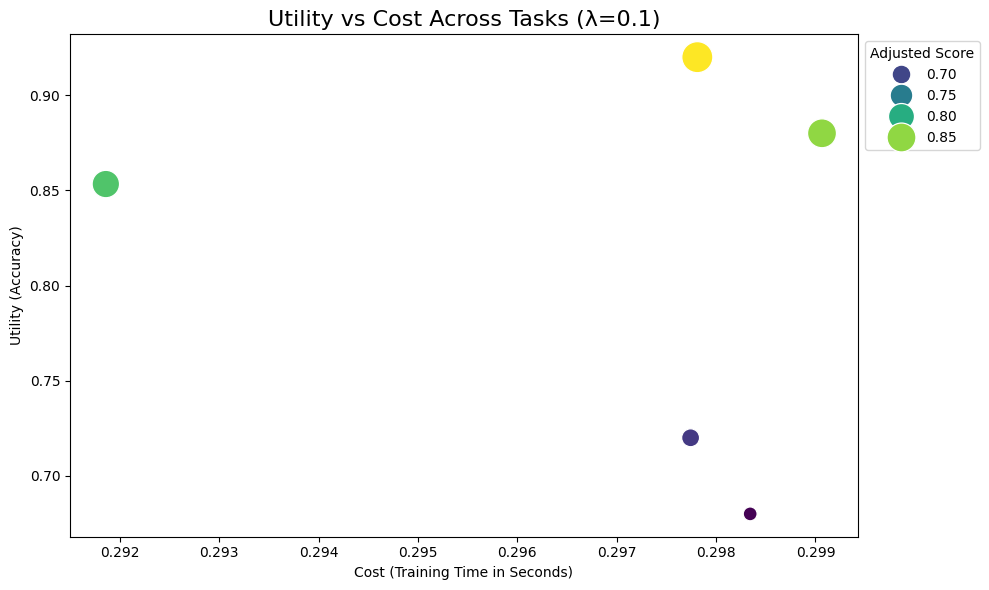

In [ ]:
plot_task_metrics(task_metrics, lambda_factor=0.1)


## Omniglot Log Regression

In [ ]:
def preprocess_omniglot_for_logreg(image, label):
    """
    Preprocess Omniglot images for Logistic Regression.
    - Normalize pixel values to [0, 1].
    - Flatten images to vectors of size 784.
    """


    # Flatten the image (28x28 -> 784)
    image = tf.reshape(image, [-1])

    return image,label


In [ ]:
# Preprocess and batch the log_dataset
def prepare_logreg_dataset(tf_dataset, batch_size=32, shuffle=True):
    log_dataset = tf_dataset.map(preprocess_omniglot_for_logreg, num_parallel_calls=tf.data.AUTOTUNE)

    if shuffle:
        log_dataset = log_dataset.shuffle(buffer_size=1000)
    log_dataset = log_dataset.batch(batch_size, drop_remainder=True)
    log_dataset = log_dataset.prefetch(tf.data.AUTOTUNE)

    return log_dataset


In [ ]:
def dataset_to_numpy(tf_dataset):
    """
    Convert TensorFlow dataset to NumPy arrays.
    """
    images, labels = [], []
    for batch_images, batch_labels in tf_dataset:
        images.extend(batch_images.numpy())
        labels.extend(batch_labels.numpy())
    return np.array(images), np.array(labels)

# Convert the dataset
X, Y = dataset_to_numpy(tf_dataset)

# Flatten images for logistic regression (28x28 -> 784)
X = X.reshape(X.shape[0], -1)  # Flatten each image
print(f"Dataset shape after flattening: {X.shape}, Labels shape: {Y.shape}")


Dataset shape after flattening: (19280, 784), Labels shape: (19280,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Debugging: Check shapes
print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")


X_train shape: (15424, 784), Y_train shape: (15424,)
X_test shape: (3856, 784), Y_test shape: (3856,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

def tune_logistic_regression(X_train, Y_train, subsample_fraction=0.2):
    """
    Perform hyperparameter tuning for Logistic Regression using GridSearchCV.

    Args:
        X_train (np.ndarray): Training features.
        Y_train (np.ndarray): Training labels.
        subsample_fraction (float): Fraction of the dataset to use for tuning.

    Returns:
        LogisticRegression: Tuned logistic regression model.
    """
    # Subsample the training data
    if subsample_fraction < 1.0:
        X_train, _, Y_train, _ = train_test_split(
            X_train, Y_train, test_size=(1 - subsample_fraction), random_state=42
        )
        print(f"Subsampled X shape: {X_train.shape}, Subsampled Y shape: {Y_train.shape}")

    # Define parameter grid
    param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0]}  # Regularization strength

    # Perform grid search
    grid_search = GridSearchCV(
        LogisticRegression(max_iter=1000),  # Removed deprecated multi_class argument
        param_grid,
        cv=3,  # 5-fold cross-validation
        scoring='accuracy',
        verbose=2  # For progress updates
    )
    grid_search.fit(X_train, Y_train)

    # Output the best parameters
    print(f"Best parameters: {grid_search.best_params_}")
    return grid_search.best_estimator_


In [ ]:
import random

def create_task_for_logreg(X, Y, num_classes, num_train_samples, num_test_samples):
    """
    Create an N-way K-shot classification task for Logistic Regression.
    """
    unique_classes = np.unique(Y)
    selected_classes = random.sample(list(unique_classes), num_classes)

    X_train, Y_train, X_test, Y_test = [], [], [], []

    for cls in selected_classes:
        class_indices = np.where(Y == cls)[0]
        class_data = X[class_indices]
        np.random.shuffle(class_data)

        if len(class_data) < num_train_samples + num_test_samples:
            raise ValueError(f"Class {cls} does not have enough samples.")

        # Split into train and test sets
        X_train.extend(class_data[:num_train_samples])
        X_test.extend(class_data[num_train_samples:num_train_samples + num_test_samples])
        Y_train.extend([cls] * num_train_samples)
        Y_test.extend([cls] * num_test_samples)

    return {
        "X_train": np.array(X_train),
        "Y_train": np.array(Y_train),
        "X_test": np.array(X_test),
        "Y_test": np.array(Y_test),
        "task_name": f"{num_classes}-way Classification Task"
    }


In [ ]:
# Tune the model with subsampling
tuned_model = tune_logistic_regression(X_train, Y_train, subsample_fraction=0.2)


Subsampled X shape: (3084, 784), Subsampled Y shape: (3084,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END .............................................C=0.01; total time=  17.4s
[CV] END .............................................C=0.01; total time=  14.1s
[CV] END .............................................C=0.01; total time=  11.4s
[CV] END ..............................................C=0.1; total time=  18.1s
[CV] END ..............................................C=0.1; total time=  18.7s
[CV] END ..............................................C=0.1; total time=  16.1s
[CV] END ..............................................C=1.0; total time=  39.6s
[CV] END ..............................................C=1.0; total time=  32.1s
[CV] END ..............................................C=1.0; total time=  34.1s
[CV] END .............................................C=10.0; total time=  46.9s
[CV] END .............................................C=10.0; total time=  37.3s
[CV] END .............................................C=10.0; total time=  30.8s
[CV] END ...................

In [ ]:
from sklearn.metrics import accuracy_score
import time

def run_logreg_pipeline_with_chollet(X, Y, tuned_model, num_classes, num_train_samples, num_test_samples, num_tasks=5, lambda_factor=0.1):
    """
    Run Logistic Regression pipeline with Chollet's measure of intelligence.
    """
    task_metrics = []

    for _ in range(num_tasks):
        # Create a task
        task = create_task_for_logreg(X, Y, num_classes, num_train_samples, num_test_samples)

        # Train and evaluate
        start_time = time.time()
        tuned_model.fit(task["X_train"], task["Y_train"])
        predictions = tuned_model.predict(task["X_test"])
        utility = accuracy_score(task["Y_test"], predictions)
        cost = time.time() - start_time

        task_metrics.append({"utility": utility, "cost": cost})
        print(f"Task: {task['task_name']} | Utility: {utility:.2f}, Cost: {cost:.2f}s")

    # Compute Chollet’s intelligence score
    total_score = 0
    for metric in task_metrics:
        total_score += metric["utility"] - lambda_factor * metric["cost"]
    intelligence_score = total_score / len(task_metrics)

    print(f"Chollet's Intelligence Score: {intelligence_score:.2f}")
    return intelligence_score, task_metrics


In [ ]:
score, task_metrics = run_logreg_pipeline_with_chollet(
    X=X,
    Y=Y,
    tuned_model=tuned_model,
    num_classes=5,              # 5-way classification
    num_train_samples=5,        # 5-shot training
    num_test_samples=15,        # 15 query samples
    num_tasks=5,                # Number of tasks
    lambda_factor=0.1           # Cost penalty
)




Task: 5-way Classification Task | Utility: 0.68, Cost: 0.03s
Task: 5-way Classification Task | Utility: 0.80, Cost: 0.04s
Task: 5-way Classification Task | Utility: 0.68, Cost: 0.05s
Task: 5-way Classification Task | Utility: 0.69, Cost: 0.05s
Task: 5-way Classification Task | Utility: 0.80, Cost: 0.04s
Chollet's Intelligence Score: 0.73


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_task_metrics(task_metrics, lambda_factor=0.1):
    """
    Visualize the relationship between utility, cost, and adjusted score across tasks.

    Args:
        task_metrics (list): List of dictionaries with "utility" and "cost" for each task.
        lambda_factor (float): Lambda factor used in Chollet's measure.
    """
    # Create a DataFrame for visualization
    data = pd.DataFrame(task_metrics)
    data['adjusted_score'] = data['utility'] - lambda_factor * data['cost']
    data['task'] = range(1, len(task_metrics) + 1)  # Add task numbers

    # Plot utility vs cost with adjusted score as size
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='cost',
        y='utility',
        size='adjusted_score',
        hue='adjusted_score',
        data=data,
        palette='viridis',
        sizes=(100, 500),
        legend='brief'
    )
    plt.title(f"Utility vs Cost Across Tasks (λ={lambda_factor})", fontsize=16)
    plt.xlabel("Cost (Training Time in Seconds)")
    plt.ylabel("Utility (Accuracy)")
    plt.legend(title="Adjusted Score", loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()


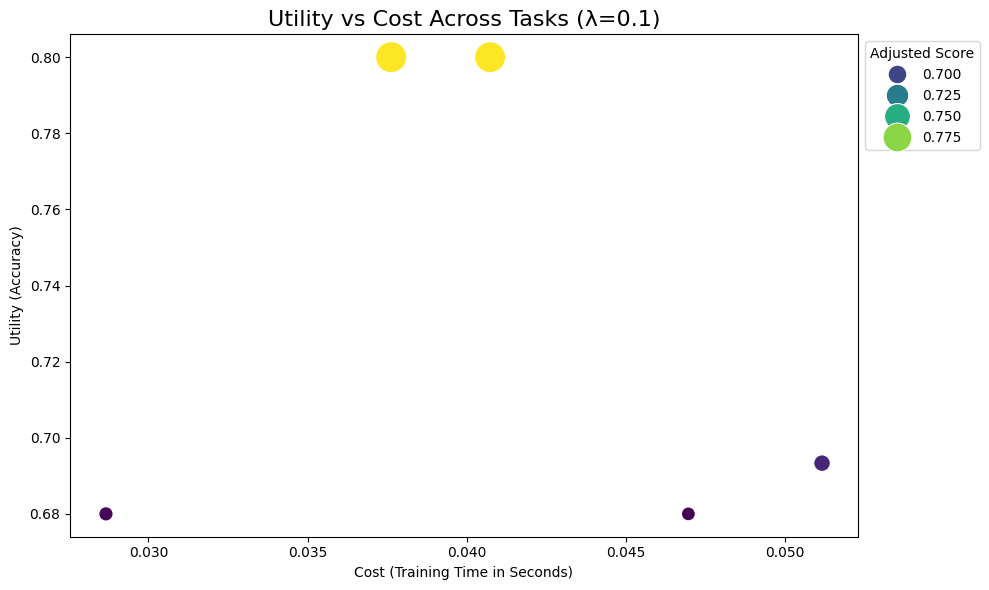

In [ ]:
plot_task_metrics(task_metrics, lambda_factor=0.1)


## Omniglot Random Forest

In [ ]:
# Convert TensorFlow dataset to NumPy and flatten
X, Y = dataset_to_numpy(tf_dataset)
X_train_flattened = X.reshape(X.shape[0], -1)  # Flatten the images

In [ ]:
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
def tune_random_forest(X_train, Y_train):
    """
    Perform hyperparameter tuning for Random Forest using GridSearchCV.
    """
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=3,
        scoring='accuracy',
        verbose=2
    )
    grid_search.fit(X_train, Y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    return grid_search.best_estimator_


In [ ]:
def create_task_for_rf(X, Y, num_classes, num_train_samples, num_test_samples):
    """
    Create an N-way K-shot task for Random Forest.
    """
    unique_classes = np.unique(Y)
    selected_classes = random.sample(list(unique_classes), num_classes)

    X_train, Y_train, X_test, Y_test = [], [], [], []

    for cls in selected_classes:
        class_indices = np.where(Y == cls)[0]
        class_data = X[class_indices]

        # Check if there are enough samples
        if len(class_data) < num_train_samples + num_test_samples:
            raise ValueError(f"Not enough samples for class {cls}.")

        # Shuffle and split
        np.random.shuffle(class_data)
        X_train.extend(class_data[:num_train_samples])
        Y_train.extend([cls] * num_train_samples)
        X_test.extend(class_data[num_train_samples:num_train_samples + num_test_samples])
        Y_test.extend([cls] * num_test_samples)

    # Flatten the data before returning
    X_train = np.array(X_train).reshape(len(X_train), -1)
    X_test = np.array(X_test).reshape(len(X_test), -1)

    return {
        "X_train": X_train,
        "Y_train": np.array(Y_train),
        "X_test": X_test,
        "Y_test": np.array(Y_test),
        "task_name": f"{num_classes}-way Classification Task"
    }


In [ ]:
def run_rf_with_chollet(X, Y, rf_model, num_classes, num_train_samples, num_test_samples, num_tasks=5, lambda_factor=0.1):
    """
    Evaluate Random Forest with Chollet's Measure of Intelligence.
    """
    task_metrics = []

    for _ in range(num_tasks):
        # Create a task
        task = create_task_for_rf(X, Y, num_classes, num_train_samples, num_test_samples)

        # Train the Random Forest on the task
        start_time = time.time()
        rf_model.fit(task["X_train"], task["Y_train"])
        cost = time.time() - start_time

        # Evaluate the Random Forest on the task
        accuracy = rf_model.score(task["X_test"], task["Y_test"])

        task_metrics.append({"utility": accuracy, "cost": cost})
        print(f"Task: {task['task_name']} | Utility (Accuracy): {accuracy:.2f}, Cost (Time): {cost:.2f}s")

    # Compute Chollet’s Intelligence Score
    intelligence_score = np.mean([m["utility"] - lambda_factor * m["cost"] for m in task_metrics])
    print(f"Chollet's Intelligence Score: {intelligence_score:.2f}")
    return intelligence_score, task_metrics


In [ ]:


# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Subsample both X_train and Y_train together
X_subset = X_train[:500]
Y_subset = Y_train[:500]

# Flatten X_subset for Random Forest
X_subset_flattened = X_subset.reshape(X_subset.shape[0], -1)
print(f"Flattened X_subset shape: {X_subset_flattened.shape}, Y_subset shape: {Y_subset.shape}")


# Tune Random Forest
tuned_rf = tune_random_forest(X_subset_flattened, Y_subset)

# Evaluate with Chollet’s Measure
score, task_metrics = run_rf_with_chollet(
    X, Y, tuned_rf, num_classes=5, num_train_samples=5, num_test_samples=15
)



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_task_metrics(task_metrics, lambda_factor=0.1):
    """
    Visualize the relationship between utility, cost, and adjusted score across tasks.

    Args:
        task_metrics (list): List of dictionaries with "utility" and "cost" for each task.
        lambda_factor (float): Lambda factor used in Chollet's measure.
    """
    # Create a DataFrame for visualization
    data = pd.DataFrame(task_metrics)
    data['adjusted_score'] = data['utility'] - lambda_factor * data['cost']
    data['task'] = range(1, len(task_metrics) + 1)  # Add task numbers

    # Plot utility vs cost with adjusted score as size
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='cost',
        y='utility',
        size='adjusted_score',
        hue='adjusted_score',
        data=data,
        palette='viridis',
        sizes=(100, 500),
        legend='brief'
    )
    plt.title(f"Utility vs Cost Across Tasks (λ={lambda_factor})", fontsize=16)
    plt.xlabel("Cost (Training Time in Seconds)")
    plt.ylabel("Utility (Accuracy)")
    plt.legend(title="Adjusted Score", loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()


In [ ]:
plot_task_metrics(task_metrics, lambda_factor=0.1)


# Flower 2

## Flower 2 Loading

In [ ]:
!git clone https://github.com/google-research/meta-dataset.git
%cd meta-dataset

In [ ]:
!pip install -r requirements.txt
!pip install tensorflow-datasets

In [2]:
import subprocess
import json
import numpy as np
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Extract the VGG Flower dataset
file_path = "/content/drive/MyDrive/datasets/vgg_flower/102flowers.tgz"
!tar -xzf "{file_path}" -C /content/drive/MyDrive/datasets/vgg_flower/
print("Extraction complete. The jpg/ directory has been created in /content/")

# Step 2: Convert the dataset to TFRecords
command = [
    "python", "-m", "meta_dataset.dataset_conversion.convert_datasets_to_records",
    "--dataset=vgg_flower",
    "--vgg_flower_data_root=/content/drive/MyDrive/datasets/vgg_flower",
    "--records_root=/content/drive/MyDrive/datasets/records"
]
result = subprocess.run(command, capture_output=True, text=True)
print(result.stdout)
print(result.stderr)

# Step 3: Load dataset specification
spec_path = "/content/drive/MyDrive/datasets/records/vgg_flower/dataset_spec.json"
with open(spec_path, "r") as f:
    dataset_spec = json.load(f)

print("Loaded dataset specification:", dataset_spec)


^C
Extraction complete. The jpg/ directory has been created in /content/

/usr/bin/python3: Error while finding module specification for 'meta_dataset.dataset_conversion.convert_datasets_to_records' (ModuleNotFoundError: No module named 'meta_dataset')

Loaded dataset specification: {'name': 'vgg_flower', 'classes_per_split': {'TRAIN': 71, 'VALID': 15, 'TEST': 16}, 'images_per_class': {'0': 82, '1': 56, '2': 105, '3': 85, '4': 78, '5': 87, '6': 130, '7': 40, '8': 56, '9': 52, '10': 52, '11': 63, '12': 85, '13': 42, '14': 128, '15': 251, '16': 137, '17': 50, '18': 154, '19': 171, '20': 71, '21': 45, '22': 40, '23': 49, '24': 41, '25': 62, '26': 258, '27': 54, '28': 48, '29': 109, '30': 87, '31': 41, '32': 54, '33': 108, '34': 75, '35': 66, '36': 71, '37': 40, '38': 46, '39': 60, '40': 82, '41': 42, '42': 45, '43': 40, '44': 93, '45': 107, '46': 120, '47': 96, '48': 85, '49': 86, '50': 194, '51': 40, '52': 61, '53': 61, '54': 67, '55': 92, '56': 76, '57': 54, '58': 49, '59': 78, '60': 16

In [3]:
def parse_tfrecords(record_dir, image_size=(128, 128)):
    """
    Parse TFRecords into images and labels.
    Args:
        record_dir: Directory containing TFRecords.
        image_size: Tuple of (width, height) to resize images.
    Returns:
        Tuple of NumPy arrays (images, labels).
    """
    def parse_example(example_proto):
        # Define feature description based on the inspected TFRecord structure
        feature_description = {
            "image": tf.io.FixedLenFeature([], tf.string),  # Encoded image
            "label": tf.io.FixedLenFeature([], tf.int64),   # Class label
        }
        example = tf.io.parse_single_example(example_proto, feature_description)
        image = tf.image.decode_jpeg(example["image"], channels=3)  # Decode JPEG
        image = tf.image.resize(image, image_size) / 255.0  # Resize and normalize
        label = example["label"]  # Class label
        return image, label

    # Create a dataset from TFRecords
    tfrecord_files = tf.io.gfile.glob(f"{record_dir}/*.tfrecords")
    raw_dataset = tf.data.TFRecordDataset(tfrecord_files)
    parsed_dataset = raw_dataset.map(parse_example)

    # Convert to NumPy arrays
    images, labels = [], []
    for image, label in parsed_dataset:
        images.append(image.numpy().flatten())  # Flatten for KNN
        labels.append(label.numpy())
    return np.array(images), np.array(labels)


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
record_dir = "/content/drive/MyDrive/datasets/records/vgg_flower"
images, labels = parse_tfrecords(record_dir)

# Create the dataset dictionary
vgg_dataset = {
    "data": images,
    "labels": labels,
    "classes": np.unique(labels)
}
print("Dataset loaded:", vgg_dataset["data"].shape, vgg_dataset["labels"].shape)


Dataset loaded: (8189, 49152) (8189,)


## Vgg_Flower Logistic Regression

In [5]:
# Extract data and labels
X_data = vgg_dataset["data"]  # Shape: (num_samples, flattened_features)
Y_data = vgg_dataset["labels"]

# Subsample for faster training (adjust fraction as needed)
from sklearn.model_selection import train_test_split

X_train, _, Y_train, _ = train_test_split(
    X_data, Y_data, test_size=0.8, random_state=42
)
print(f"Training set shape: {X_train.shape}, {Y_train.shape}")


Training set shape: (1637, 49152), (1637,)


In [6]:
def create_task(dataset, num_classes, num_train_samples, num_test_samples):
    """
    Create a task by sampling `num_classes` and splitting into train/test sets.
    """
    selected_classes = np.random.choice(dataset["classes"], size=num_classes, replace=False)
    X_train, Y_train, X_test, Y_test = [], [], [], []

    for cls in selected_classes:
        # Filter data and labels for the current class
        class_indices = np.where(dataset["labels"] == cls)[0]
        class_data = dataset["data"][class_indices]
        class_labels = dataset["labels"][class_indices]

        # Ensure there are enough samples
        if len(class_data) < num_train_samples + num_test_samples:
            raise ValueError(f"Class {cls} has insufficient samples.")

        # Shuffle and split
        indices = np.random.permutation(len(class_data))
        train_indices = indices[:num_train_samples]
        test_indices = indices[num_train_samples:num_train_samples + num_test_samples]

        X_train.extend(class_data[train_indices])
        Y_train.extend(class_labels[train_indices])
        X_test.extend(class_data[test_indices])
        Y_test.extend(class_labels[test_indices])

    return {
        "X_train": np.array(X_train),
        "Y_train": np.array(Y_train),
        "X_test": np.array(X_test),
        "Y_test": np.array(Y_test),
        "task_name": f"{num_classes}-way Classification Task"
    }


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
import time
import numpy as np

def tune_logistic_regressionflower(X_train, Y_train, subsample_fraction=0.2):
    """
    Perform hyperparameter tuning for Logistic Regression using GridSearchCV.

    Args:
        X_train (np.ndarray): Training features.
        Y_train (np.ndarray): Training labels.
        subsample_fraction (float): Fraction of the dataset to use for tuning.

    Returns:
        LogisticRegression: Tuned logistic regression model.
    """
    # Reshape the data (flatten the images)
    X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten from (28, 28, 1) to (784,)
    print(f"Flattened X_train shape: {X_train.shape}")

    # Subsample the training data
    if subsample_fraction < 1.0:
        X_train, _, Y_train, _ = train_test_split(
            X_train, Y_train, test_size=(1 - subsample_fraction), random_state=42
        )
        print(f"Subsampled X shape: {X_train.shape}, Subsampled Y shape: {Y_train.shape}")

    # Define parameter grid
    param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0]}  # Regularization strength

    # Tune Logistic Regression
    grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, solver='saga'),
    param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0]},
    cv=StratifiedKFold(n_splits=3),
    scoring='accuracy'
    )
    grid_search.fit(X_train, Y_train)

    # Output the best parameters
    print(f"Best parameters: {grid_search.best_params_}")
    return grid_search.best_estimator_


In [8]:
def evaluate_with_chollet(model, dataset, num_tasks, num_classes, num_train_samples, num_test_samples, lambda_factor=0.1):
    """
    Evaluate a model using Chollet's measure of intelligence.
    """
    task_metrics = []

    for _ in range(num_tasks):
        task = create_task(dataset, num_classes, num_train_samples, num_test_samples)
        X_train, Y_train = task["X_train"], task["Y_train"]
        X_test, Y_test = task["X_test"], task["Y_test"]

        # Train the model
        start_time = time.time()
        model.fit(X_train, Y_train)
        training_time = time.time() - start_time

        # Evaluate accuracy
        accuracy = model.score(X_test, Y_test)

        # Record task metrics
        task_metrics.append({"utility": accuracy, "cost": training_time})
        print(f"Task: {task['task_name']} | Accuracy: {accuracy:.2f}, Cost: {training_time:.2f}s")

    # Compute Chollet's intelligence score
    total_score = sum(metric["utility"] - lambda_factor * metric["cost"] for metric in task_metrics)
    return total_score / len(task_metrics), task_metrics


In [9]:
from sklearn.utils import resample

def balance_classes(X, Y):
    unique_classes = np.unique(Y)
    balanced_X, balanced_Y = [], []

    for cls in unique_classes:
        cls_indices = np.where(Y == cls)[0]
        cls_X = X[cls_indices]
        cls_Y = Y[cls_indices]

        if len(cls_indices) < 10:  # Minimum desired samples per class
            cls_X, cls_Y = resample(cls_X, cls_Y, replace=True, n_samples=10, random_state=42)

        balanced_X.append(cls_X)
        balanced_Y.append(cls_Y)

    return np.vstack(balanced_X), np.hstack(balanced_Y)

X_balanced, Y_balanced = balance_classes(X_train, Y_train)
print(f"Balanced dataset shape: {X_balanced.shape}, {Y_balanced.shape}")


Balanced dataset shape: (1689, 49152), (1689,)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# Step 1: Balance and reduce dimensionality
X_balanced, Y_balanced = balance_classes(X_train, Y_train)
pca = PCA(n_components=50)
X_reduced = pca.fit_transform(X_balanced)

# Step 2: Oversample the dataset
smote = SMOTE(random_state=42)
X_oversampled, Y_oversampled = smote.fit_resample(X_reduced, Y_balanced)

# Step 3: Subsample the dataset (optional, for speed)
X_subsampled, _, Y_subsampled, _ = train_test_split(
    X_oversampled, Y_oversampled, test_size=0.7, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subsampled)

# Adjust class weights
class_weights = compute_class_weight('balanced', classes=np.unique(Y_subsampled), y=Y_subsampled)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(Y_subsampled), class_weights)}

# Define grid search
grid_search = GridSearchCV(
    LogisticRegression(max_iter=5000, solver='saga', class_weight=class_weight_dict),
    param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
    cv=StratifiedKFold(n_splits=2),
    scoring='accuracy',
    verbose=2
)

# Fit the model
grid_search.fit(X_scaled, Y_subsampled)

# Output best parameters
print(f"Best parameters: {grid_search.best_params_}")


Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END ............................................C=0.001; total time=   0.6s
[CV] END ............................................C=0.001; total time=   0.7s
[CV] END .............................................C=0.01; total time=   0.7s
[CV] END .............................................C=0.01; total time=   0.8s
[CV] END ..............................................C=0.1; total time=   1.8s
[CV] END ..............................................C=0.1; total time=   1.9s
[CV] END ..............................................C=1.0; total time=   5.0s
[CV] END ..............................................C=1.0; total time=   3.6s
[CV] END .............................................C=10.0; total time=   8.0s
[CV] END .............................................C=10.0; total time=   6.9s
[CV] END ............................................C=100.0; total time=  17.4s
[CV] END ........................................

In [11]:


score, task_metrics = evaluate_with_chollet(
    grid_search.best_estimator_,
    vgg_dataset,  # Original dataset
    num_tasks=5,
    num_classes=5,
    num_train_samples=10,
    num_test_samples=20
)
print(f"Chollet's Intelligence Score: {score:.2f}")


Task: 5-way Classification Task | Accuracy: 0.59, Cost: 88.33s
Task: 5-way Classification Task | Accuracy: 0.56, Cost: 96.68s
Task: 5-way Classification Task | Accuracy: 0.80, Cost: 93.42s
Task: 5-way Classification Task | Accuracy: 0.66, Cost: 86.73s
Task: 5-way Classification Task | Accuracy: 0.74, Cost: 85.11s
Chollet's Intelligence Score: -8.34


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_task_metrics(task_metrics, lambda_factor=0.1):
    """
    Visualize the relationship between utility, cost, and adjusted score across tasks.

    Args:
        task_metrics (list): List of dictionaries with "utility" and "cost" for each task.
        lambda_factor (float): Lambda factor used in Chollet's measure.
    """
    # Create a DataFrame for visualization
    data = pd.DataFrame(task_metrics)
    data['adjusted_score'] = data['utility'] - lambda_factor * data['cost']
    data['task'] = range(1, len(task_metrics) + 1)  # Add task numbers

    # Plot utility vs cost with adjusted score as size
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='cost',
        y='utility',
        size='adjusted_score',
        hue='adjusted_score',
        data=data,
        palette='viridis',
        sizes=(100, 500),
        legend='brief'
    )
    plt.title(f"Utility vs Cost Across Tasks (λ={lambda_factor})", fontsize=16)
    plt.xlabel("Cost (Training Time in Seconds)")
    plt.ylabel("Utility (Accuracy)")
    plt.legend(title="Adjusted Score", loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()


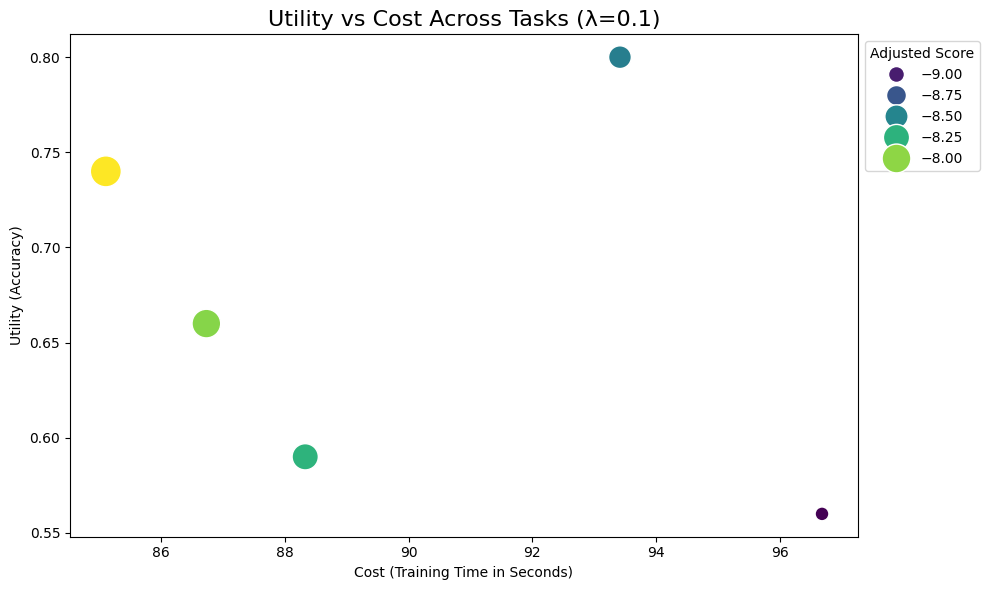

In [13]:
plot_task_metrics(task_metrics, lambda_factor=0.1)

## Vgg_Flower Random Forest

In [14]:
# Parse TFRecords to load dataset
images, labels = parse_tfrecords(record_dir, image_size=(128, 128))

# Subsample for speed
X_subsampled, Y_subsampled = images[:1000], labels[:1000]  # Adjust size for faster tuning

# Flatten the data for Random Forest
X_flattened = X_subsampled.reshape(X_subsampled.shape[0], -1)
print(f"Flattened X shape: {X_flattened.shape}, Y shape: {Y_subsampled.shape}")


Flattened X shape: (1000, 49152), Y shape: (1000,)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def tune_random_forest(X_train, Y_train, subsample_fraction=0.2):
    """
    Tune a Random Forest model using GridSearchCV.
    """
    # Subsample the training data
    if subsample_fraction < 1.0:
        X_train, _, Y_train, _ = train_test_split(
            X_train, Y_train, test_size=(1 - subsample_fraction), random_state=42
        )
        print(f"Subsampled X shape: {X_train.shape}, Subsampled Y shape: {Y_train.shape}")

    # Parameter grid for Random Forest
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [10, None],
        'min_samples_split': [2],
        'min_samples_leaf': [1],
    }

    # GridSearchCV setup
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=3,  # Cross-validation
        scoring='accuracy',
        verbose=2,
        n_jobs=-1
    )
    grid_search.fit(X_train, Y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    return grid_search.best_estimator_


In [16]:
def evaluate_with_chollet_rf(model, dataset, num_tasks=5, num_classes=5, num_train_samples=10, num_test_samples=20):
    """
    Evaluate Chollet's measure for a Random Forest model.
    """
    def create_task(dataset, num_classes, num_train_samples, num_test_samples):
        selected_classes = np.random.choice(dataset["classes"], size=num_classes, replace=False)
        X_train, Y_train, X_test, Y_test = [], [], [], []

        for cls in selected_classes:
            class_indices = np.where(dataset["labels"] == cls)[0]
            sampled_indices = np.random.choice(class_indices, num_train_samples + num_test_samples, replace=False)
            X_train.extend(dataset["data"][sampled_indices[:num_train_samples]])
            Y_train.extend([cls] * num_train_samples)
            X_test.extend(dataset["data"][sampled_indices[num_train_samples:]])
            Y_test.extend([cls] * num_test_samples)

        return {
            "X_train": np.array(X_train).reshape(len(X_train), -1),  # Flatten for RF
            "Y_train": np.array(Y_train),
            "X_test": np.array(X_test).reshape(len(X_test), -1),    # Flatten for RF
            "Y_test": np.array(Y_test),
        }

    task_metrics = []
    for _ in range(num_tasks):
        # Create a task
        task = create_task(dataset, num_classes, num_train_samples, num_test_samples)
        start_time = time.time()

        # Train and evaluate
        model.fit(task["X_train"], task["Y_train"])
        accuracy = model.score(task["X_test"], task["Y_test"])
        cost = time.time() - start_time

        task_metrics.append({"utility": accuracy, "cost": cost})
        print(f"Task Accuracy: {accuracy:.2f}, Training Cost: {cost:.2f}s")

    # Calculate Chollet's Intelligence Score
    score = np.mean([tm["utility"] - 0.1 * tm["cost"] for tm in task_metrics])
    return score, task_metrics


In [17]:
# Dataset preparation
vgg_dataset = {
    "data": X_flattened,
    "labels": Y_subsampled,
    "classes": np.unique(Y_subsampled)
}

# Tune Random Forest
rf_model = tune_random_forest(X_flattened, Y_subsampled, subsample_fraction=0.2)

# Evaluate with Chollet's Measure
score, task_metrics = evaluate_with_chollet_rf(
    rf_model,
    vgg_dataset,
    num_tasks=5,
    num_classes=5,
    num_train_samples=10,
    num_test_samples=20
)

print(f"Chollet's Intelligence Score: {score:.2f}")


Subsampled X shape: (200, 49152), Subsampled Y shape: (200,)
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Task Accuracy: 0.47, Training Cost: 0.42s
Task Accuracy: 0.38, Training Cost: 0.39s
Task Accuracy: 0.71, Training Cost: 0.39s
Task Accuracy: 0.45, Training Cost: 0.41s
Task Accuracy: 0.57, Training Cost: 0.39s
Chollet's Intelligence Score: 0.48


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_task_metrics(task_metrics, lambda_factor=0.1):
    """
    Visualize the relationship between utility, cost, and adjusted score across tasks.

    Args:
        task_metrics (list): List of dictionaries with "utility" and "cost" for each task.
        lambda_factor (float): Lambda factor used in Chollet's measure.
    """
    # Create a DataFrame for visualization
    data = pd.DataFrame(task_metrics)
    data['adjusted_score'] = data['utility'] - lambda_factor * data['cost']
    data['task'] = range(1, len(task_metrics) + 1)  # Add task numbers

    # Plot utility vs cost with adjusted score as size
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='cost',
        y='utility',
        size='adjusted_score',
        hue='adjusted_score',
        data=data,
        palette='viridis',
        sizes=(100, 500),
        legend='brief'
    )
    plt.title(f"Utility vs Cost Across Tasks (λ={lambda_factor})", fontsize=16)
    plt.xlabel("Cost (Training Time in Seconds)")
    plt.ylabel("Utility (Accuracy)")
    plt.legend(title="Adjusted Score", loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()


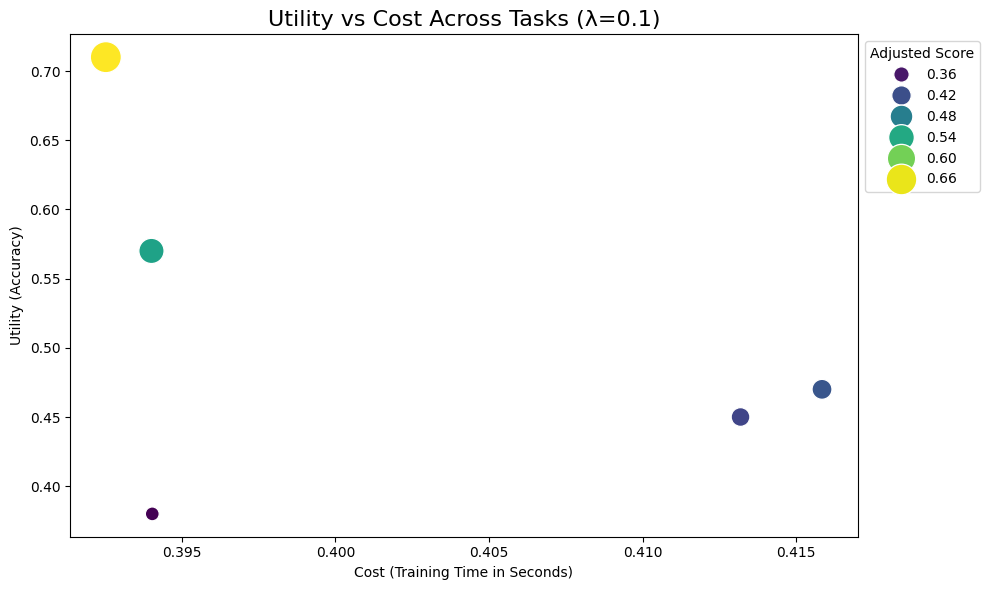

In [19]:
plot_task_metrics(task_metrics, lambda_factor=0.1)

## Vgg_Flower CNN

In [ ]:
!pip install scikeras


In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam, SGD
from keras.models import Model

def build_cnn_model(input_shape=(128, 128, 3), activation='relu', dropout_rate=0.5, optimizer='adam', learning_rate=0.001):
    # Input layer
    inputs = Input(shape=input_shape)

    # Convolutional and Pooling Layers
    x = Conv2D(32, (3, 3), activation=activation)(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout_rate)(x)
    x = Conv2D(64, (3, 3), activation=activation)(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout_rate)(x)

    # Fully Connected Layers
    x = Flatten()(x)
    x = Dense(128, activation=activation)(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(102, activation='softmax')(x)  # Update number of classes as per your dataset

    # Model
    model = Model(inputs, outputs)

    # Configure optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

cnn_classifier = KerasClassifier(
    model=build_cnn_model,
    activation='relu',           # Default value
    dropout_rate=0.5,            # Default value
    optimizer='adam',            # Default value
    learning_rate=0.001,         # Default value
    epochs=10,
    batch_size=32,
    verbose=0
)



In [ ]:
# Assuming you already have parsed the dataset into NumPy arrays
X_train, Y_train = images, labels


# Subsample for faster tuning (optional)
X_subsampled, Y_subsampled = X_train[:1000], Y_train[:1000]  # Adjust sample size as needed
print(f"Subsampled data shape: {X_subsampled.shape}, {Y_subsampled.shape}")


Subsampled data shape: (1000, 49152), (1000,)


In [ ]:
# Reshape the data to the expected shape for CNNs
X_train_cnn = X_train.reshape(-1, 128, 128, 3)
X_subsampled_cnn = X_subsampled.reshape(-1, 128, 128, 3)

print(f"Reshaped data shape: {X_train_cnn.shape}, {X_subsampled_cnn.shape}")

Reshaped data shape: (8189, 128, 128, 3), (1000, 128, 128, 3)


In [ ]:
# Normalize and reshape for CNN
X_subsampled_cnn = X_train[:100] / 255.0  # Subsample and normalize
Y_subsampled_cnn = Y_train[:100]

# Ensure the shape is (batch_size, 128, 128, 3)
X_subsampled_cnn = X_subsampled_cnn.reshape(-1, 128, 128, 3)

print(f"Reshaped data shape: {X_subsampled_cnn.shape}, {Y_subsampled_cnn.shape}")

Reshaped data shape: (100, 128, 128, 3), (100,)


In [ ]:
param_grid = {
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.3],
    'optimizer': ['adam', 'sgd'],
    'learning_rate': [0.001]
}

grid_search = GridSearchCV(
    estimator=cnn_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=2,
    verbose=2
)



In [ ]:
grid_search.fit(X_subsampled_cnn, Y_subsampled_cnn)

# Output the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END activation=relu, dropout_rate=0.3, learning_rate=0.001, optimizer=adam; total time=   6.3s
[CV] END activation=relu, dropout_rate=0.3, learning_rate=0.001, optimizer=adam; total time=   6.0s
[CV] END activation=relu, dropout_rate=0.3, learning_rate=0.001, optimizer=sgd; total time=   6.2s
[CV] END activation=relu, dropout_rate=0.3, learning_rate=0.001, optimizer=sgd; total time=   6.4s
[CV] END activation=tanh, dropout_rate=0.3, learning_rate=0.001, optimizer=adam; total time=   6.4s
[CV] END activation=tanh, dropout_rate=0.3, learning_rate=0.001, optimizer=adam; total time=   7.0s
[CV] END activation=tanh, dropout_rate=0.3, learning_rate=0.001, optimizer=sgd; total time=   6.8s
[CV] END activation=tanh, dropout_rate=0.3, learning_rate=0.001, optimizer=sgd; total time=   6.1s
Best parameters: {'activation': 'relu', 'dropout_rate': 0.3, 'learning_rate': 0.001, 'optimizer': 'adam'}
Best cross-validation accuracy: 0.56


In [ ]:
import numpy as np
import time
from sklearn.model_selection import train_test_split
import tensorflow as tf

def create_tasks(X, Y, num_tasks=5, num_classes_per_task=5, num_train_samples=10, num_test_samples=20):
    """
    Create few-shot learning tasks from the dataset.
    Args:
        X (np.ndarray): Dataset features (images).
        Y (np.ndarray): Dataset labels.
        num_tasks (int): Number of tasks to create.
        num_classes_per_task (int): Number of classes per task.
        num_train_samples (int): Number of training samples per class.
        num_test_samples (int): Number of test samples per class.
    Returns:
        list of dict: List of tasks, each containing train and test data.
    """
    tasks = []
    unique_classes = np.unique(Y)
    for _ in range(num_tasks):
        selected_classes = np.random.choice(unique_classes, num_classes_per_task, replace=False)
        X_task, Y_task = [], []
        for c in selected_classes:
            class_indices = np.where(Y == c)[0]
            selected_indices = np.random.choice(class_indices, num_train_samples + num_test_samples, replace=False)
            X_task.append(X[selected_indices])
            Y_task.append([c] * len(selected_indices))

        X_task = np.vstack(X_task)
        Y_task = np.hstack(Y_task)

        # Split into train and test
        X_train, X_test, Y_train, Y_test = train_test_split(
            X_task, Y_task, train_size=num_train_samples * num_classes_per_task
        )

        tasks.append({
            "X_train": X_train,
            "Y_train": Y_train,
            "X_test": X_test,
            "Y_test": Y_test
        })
    return tasks

def evaluate_with_chollet(model, X, Y, num_tasks=5, num_classes=5, num_train_samples=10, num_test_samples=20, lambda_factor=0.1):
    """
    Evaluate the model using Chollet's measure of intelligence, including cost.
    Args:
        model: Pre-trained model to fine-tune and evaluate.
        X (np.ndarray): Dataset features.
        Y (np.ndarray): Dataset labels.
        num_tasks (int): Number of tasks to evaluate.
        num_classes (int): Number of classes per task.
        num_train_samples (int): Training samples per class for each task.
        num_test_samples (int): Test samples per class for each task.
        lambda_factor (float): Weight for penalizing cost (time).
    Returns:
        float: Chollet's Intelligence Score.
        list of dict: Task metrics containing utility (accuracy) and cost (training time) for each task.
    """
    tasks = create_tasks(X, Y, num_tasks, num_classes, num_train_samples, num_test_samples)
    task_metrics = []

    for i, task in enumerate(tasks):
        print(f"Evaluating task {i + 1}/{num_tasks}...")

        # Fine-tune the model on task-specific training data
        task_model = tf.keras.models.clone_model(model)
        task_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

        # Track training time
        start_time = time.time()
        task_model.fit(task["X_train"], task["Y_train"], epochs=3, verbose=0)  # Fine-tuning
        training_time = time.time() - start_time

        # Evaluate on the test set
        _, accuracy = task_model.evaluate(task["X_test"], task["Y_test"], verbose=0)

        # Store task metrics
        task_metrics.append({"utility": accuracy, "cost": training_time})
        print(f"Task {i + 1} accuracy: {accuracy:.2f}, Training Time: {training_time:.2f}s")

    # Compute Chollet's Intelligence Score
    chollet_score = np.mean([tm["utility"] - lambda_factor * tm["cost"] for tm in task_metrics])
    print(f"Chollet's Intelligence Score: {chollet_score:.2f}")

    return chollet_score, task_metrics


In [ ]:
# Example: Run Chollet's evaluation on the CNN
num_tasks = 5
num_classes_per_task = 5
num_train_samples = 10
num_test_samples = 20

chollet_score, task_metrics = evaluate_with_chollet(
    model=grid_search.best_estimator_.model_,
    X=X_train_cnn,
    Y=Y_train,
    num_tasks=num_tasks,
    num_classes=num_classes_per_task,
    num_train_samples=num_train_samples,
    num_test_samples=num_test_samples
)




Evaluating task 1/5...
Task 1 accuracy: 0.35, Training Time: 2.68s
Evaluating task 2/5...
Task 2 accuracy: 0.43, Training Time: 2.95s
Evaluating task 3/5...
Task 3 accuracy: 0.34, Training Time: 2.72s
Evaluating task 4/5...
Task 4 accuracy: 0.38, Training Time: 2.86s
Evaluating task 5/5...
Task 5 accuracy: 0.17, Training Time: 2.91s
Chollet's Intelligence Score: 0.05


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_task_metrics(task_metrics, lambda_factor=0.1):
    """
    Visualize the relationship between utility, cost, and adjusted score across tasks.

    Args:
        task_metrics (list): List of dictionaries with "utility" and "cost" for each task.
        lambda_factor (float): Lambda factor used in Chollet's measure.
    """
    # Create a DataFrame for visualization
    data = pd.DataFrame(task_metrics)
    data['adjusted_score'] = data['utility'] - lambda_factor * data['cost']
    data['task'] = range(1, len(task_metrics) + 1)  # Add task numbers

    # Plot utility vs cost with adjusted score as size
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='cost',
        y='utility',
        size='adjusted_score',
        hue='adjusted_score',
        data=data,
        palette='viridis',
        sizes=(100, 500),
        legend='brief'
    )
    plt.title(f"Utility vs Cost Across Tasks (λ={lambda_factor})", fontsize=16)
    plt.xlabel("Cost (Training Time in Seconds)")
    plt.ylabel("Utility (Accuracy)")
    plt.legend(title="Adjusted Score", loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()


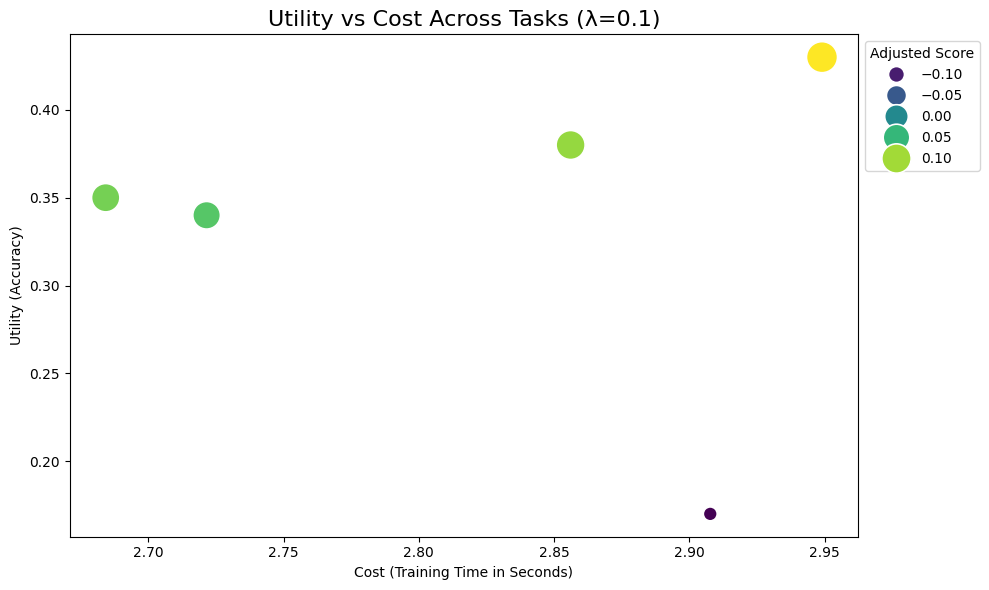

In [ ]:
plot_task_metrics(task_metrics, lambda_factor=0.1)